In [ ]:
"""
To create plots and graphs for the r01 grant

Plots to Do:
1) All synapse recall for all validation set and validation set with axon length>1000
2) Presyn synapse recall for all validation set and validation set with axon length>1000
"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [3]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-26 04:53:46,978 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-26 04:53:46,980 - settings - Setting database.user to celiib
INFO - 2021-02-26 04:53:46,980 - settings - Setting database.password to newceliipass
INFO - 2021-02-26 04:53:46,984 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-02-26 04:53:46,985 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 04:53:46,998 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-02-26 04:53:47,360 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 04:53:47,403 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 04:53:47,901 - settings - Setting enable_python_native_blobs to True


In [4]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd

INFO - 2021-02-26 04:53:48,053 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 04:53:48,578 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu

# Getting the Validation Dfs and Assembling the Full One

In [6]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=True) for k in segment_ids]

Synapsse Results:
Total Number of Synapses = 3990
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 29
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 65
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 73
n_errored_syn_ids_presyn = 448
n_valid_syn_ids_postsyn = 3899
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 923
n_valid_syn_ids_presyn = 13
n_errored_syn_ids_presyn = 153
n_valid_syn_ids_postsyn = 753
n_errored_syn_ids_postsyn = 4
Synapsse Results:
Total Number of Synapses = 4361
n_valid_syn_ids_presyn = 87
n_errored_syn_ids_presyn = 620
n_valid_syn_ids_postsyn = 3649
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 76
n_errored_syn_ids_presyn = 345
n_valid_syn_ids_postsyn = 3007
n_errored_syn_ids_postsyn = 24
Synapsse Results:
Total Number of Synapses = 3190
n_valid_syn_ids_presyn = 18
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 3081
n_errored_sy

Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 108
n_valid_syn_ids_postsyn = 1536
n_errored_syn_ids_postsyn = 1
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 72
n_errored_syn_ids_presyn = 219
n_valid_syn_ids_postsyn = 4328
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 2383
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 47
n_valid_syn_ids_postsyn = 2334
n_errored_syn_ids_postsyn = 2
Synapsse Results:
Total Number of Synapses = 4015
n_valid_syn_ids_presyn = 12
n_errored_syn_ids_presyn = 109
n_valid_syn_ids_postsyn = 3879
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 1914
n_valid_syn_ids_presyn = 3
n_errored_syn_ids_presyn = 212
n_valid_syn_ids_postsyn = 1528
n_errored_syn_ids_postsyn = 171
Synapsse Results:
Total Number of Synapses = 10012
n_valid_syn_ids_presyn = 8
n_errored_syn_ids_presyn = 164
n_valid_syn_ids_postsyn = 9825
n_errored_

In [8]:
validation_dfs_combined = pd.concat(validation_dfs)
validation_dfs_combined

,synapse_id,synapse_type,auto_valid,synapse_x,synapse_y,synapse_z,manual_valid,category,old_segment_id,new_segment_id,euclidean_distance_to_nuclei
0,420075100,presyn,True,1338912,703800,781360,True,TP,864691136370815112,864691135761725238,68960.291531
1,420524241,presyn,True,1332432,695728,775840,True,TP,864691136370815112,864691135761725238,66106.785007
2,426025528,presyn,True,1342728,772280,824080,True,TP,864691136370815112,864691135761725238,130854.841408
3,427774004,presyn,True,1342840,765076,827560,True,TP,864691136370815112,864691135761725238,124127.512502
4,429266323,presyn,True,1347640,701952,804680,True,TP,864691136370815112,864691135761725238,59946.874748
...,...,...,...,...,...,...,...,...,...,...,...
11059,435635056,postsyn,False,1358832,772464,782960,True,FN,864691136008573614,864691135782544435,138622.404077
11060,435636135,postsyn,False,1361124,772496,784840,True,FN,864691136008573614,864691135782544435,141351.226270
11061,435636390,postsyn,False,1362604,772396,785320,True,FN,864691136008573614,864691135782544435,142524.643652
11062,436143082,postsyn,False,1360588,742316,796640,True,FN,864691136008573614,864691135782544435,143926.225991


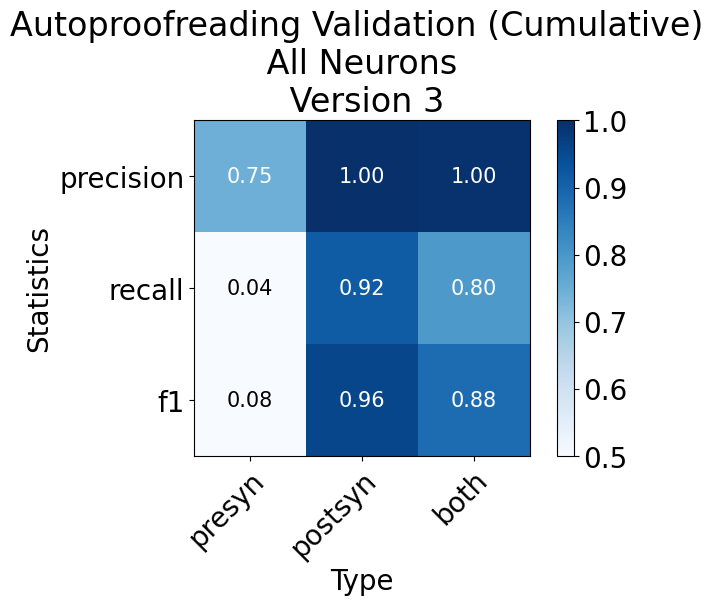

In [17]:
#for all the neurons
vu.synapse_validation_df_to_score_plot(validation_df=validation_dfs_combined,
                                   title = "Autoproofreading Validation (Cumulative) \n All Neurons \n Version 3")

In [22]:
def filter_synapse_validation_df_by_segment_ids(validation_df,
                                               segment_ids,
                                               segment_id_type="old_segment_id"):
    """
    Purpose: To Restrict a dataframe to certain ids
    
    """
    return validation_df[validation_df[segment_id_type].isin(segment_ids)]

def filter_synapse_validation_df_by_query(validation_df,
                                         query,
                                         table_to_query=minnie.AutoProofreadValidationNeurons):
    seg_ids_in_query = (table_to_query() & curr_query).fetch("segment_id")
    return filter_synapse_validation_df_by_segment_ids(validation_df,seg_ids_in_query)

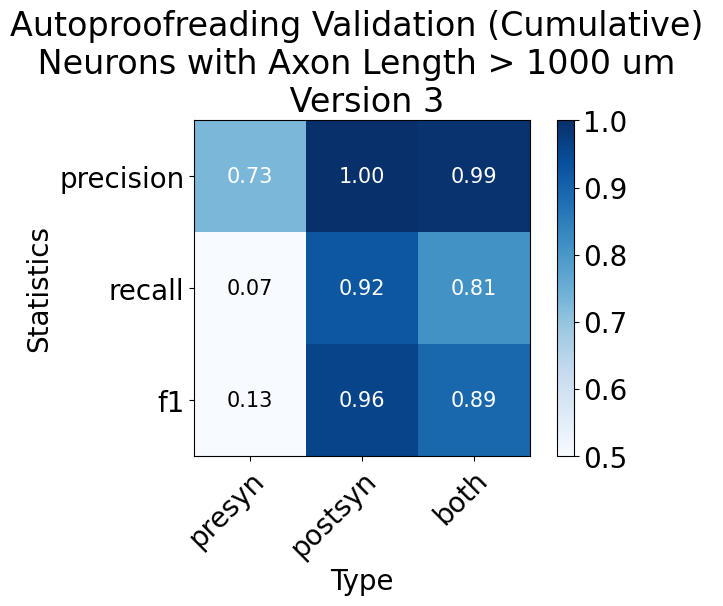

In [25]:
axon_length = 1000
curr_query = f"axon_length>{axon_length}"

axon_filtered_df = filter_synapse_validation_df_by_query(validation_dfs_combined,
                                     query=curr_query)

vu.synapse_validation_df_to_score_plot(validation_df=axon_filtered_df,
                                   title = ("Autoproofreading Validation (Cumulative) "
                                            f"\n Neurons with Axon Length > 1000 um "
                                            f" \n Version 3"))

# Doing the distance vs Recall

In [28]:
cumulative_validation_df = validation_dfs_combined

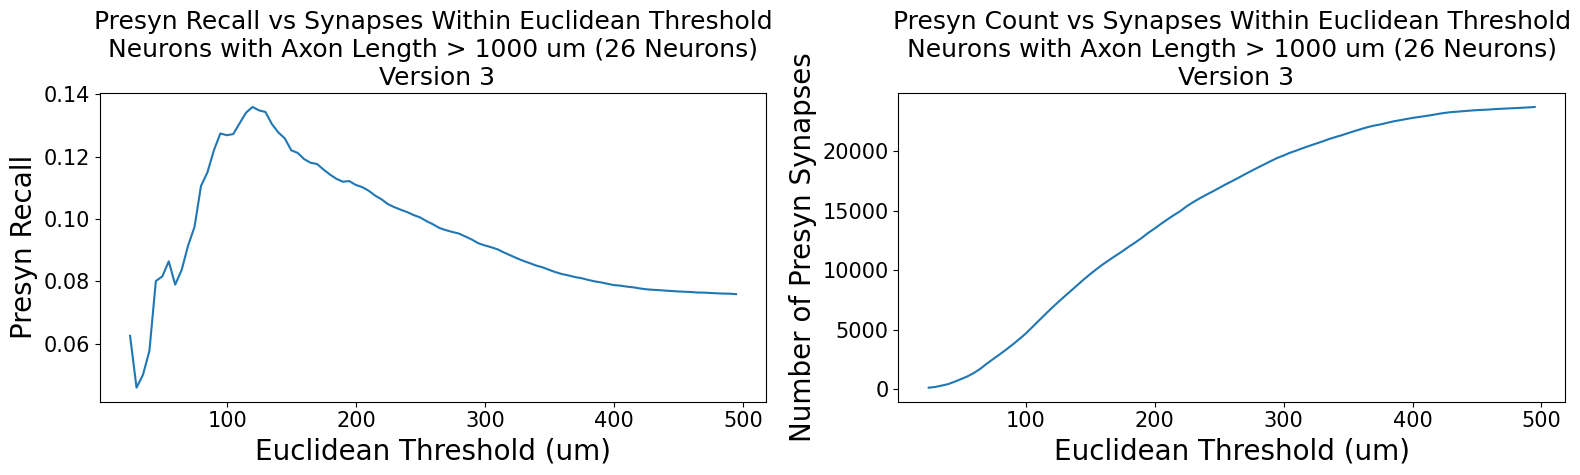

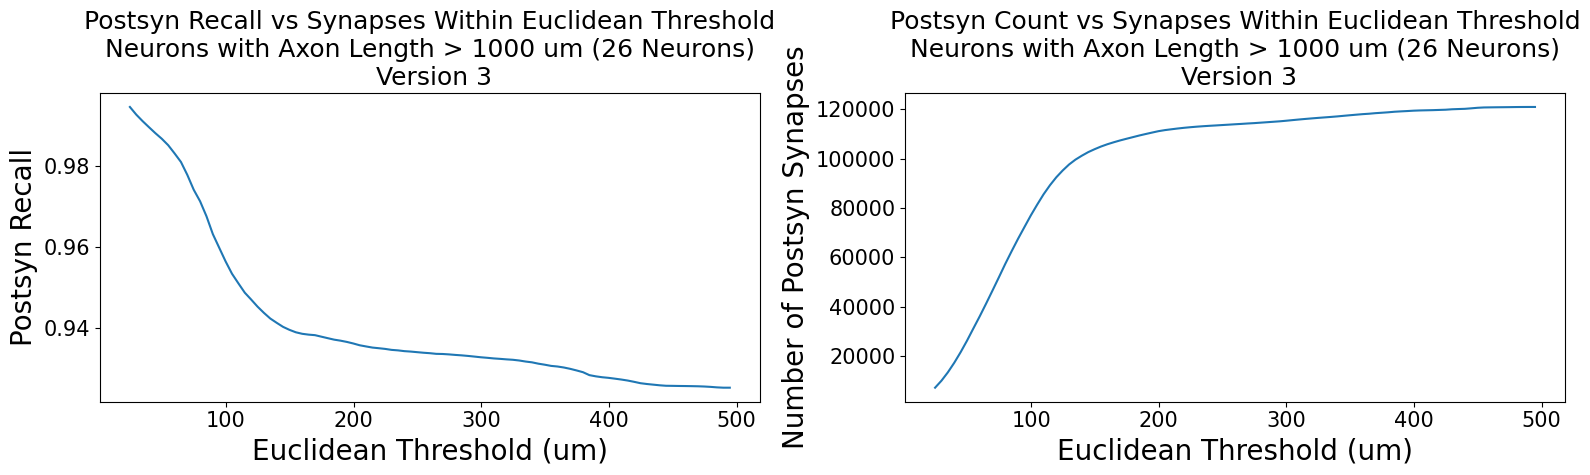

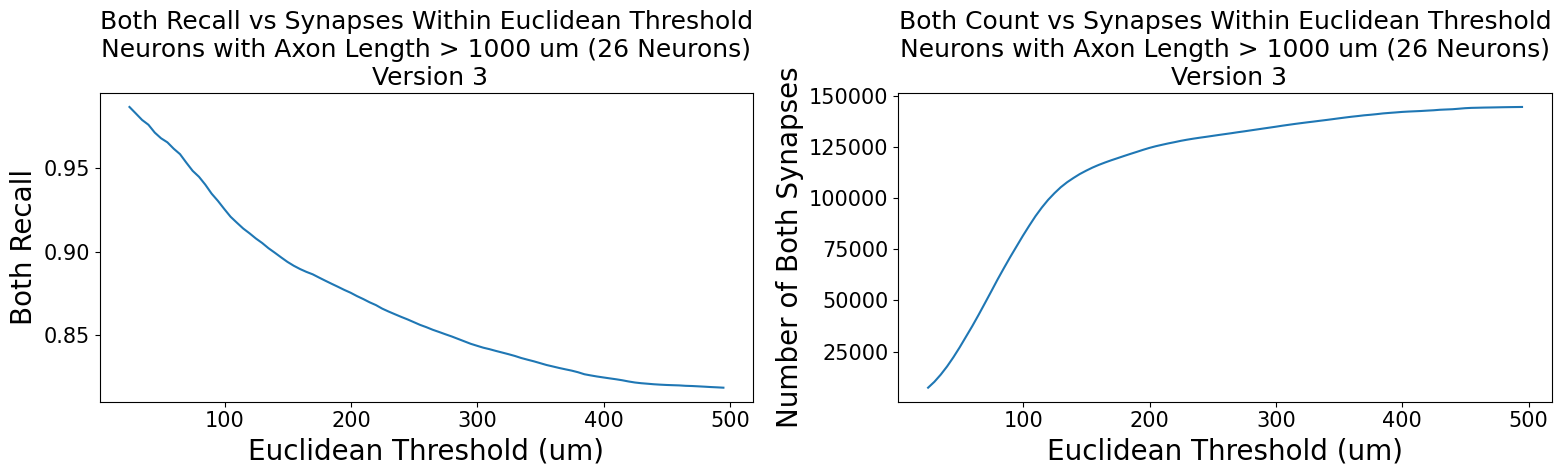

In [55]:
axon_length = 1000
curr_query = f"axon_length>{axon_length}"
curr_query_title = f"Axon Length > {axon_length} um"
seg_ids_in_query = (minnie.AutoProofreadValidationNeurons() & curr_query).fetch("segment_id")

current_validation_df = cumulative_validation_df[cumulative_validation_df["old_segment_id"].isin(seg_ids_in_query)]

vu.score_vs_euclidean_synapse_threshold_analysis(current_validation_df,
                    title_append=f"Neurons with {curr_query_title} ({len(seg_ids_in_query)} Neurons)\n Version 3",
                    font_size = 15,
                    fig_width=8,
                    fig_height=5,
                    axes_font_size=20)

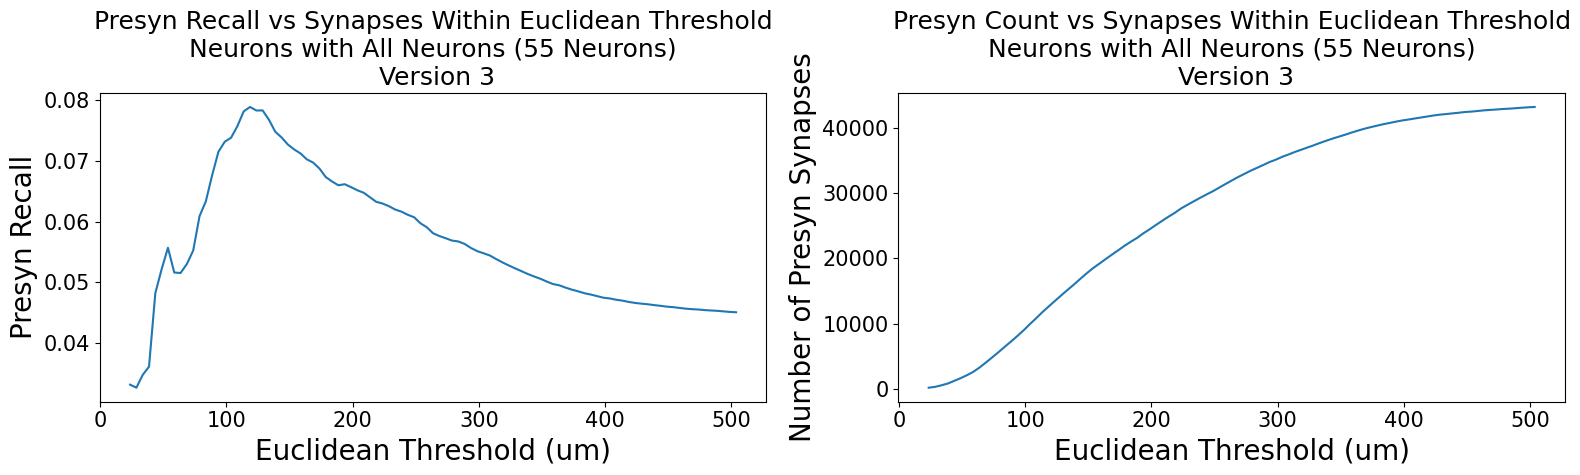

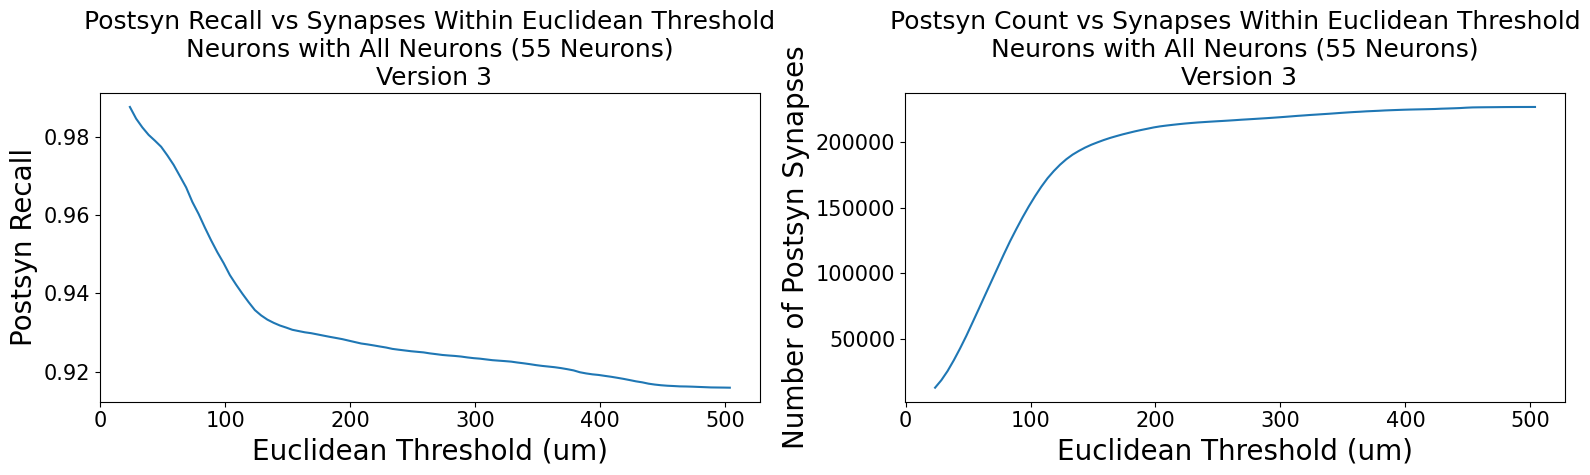

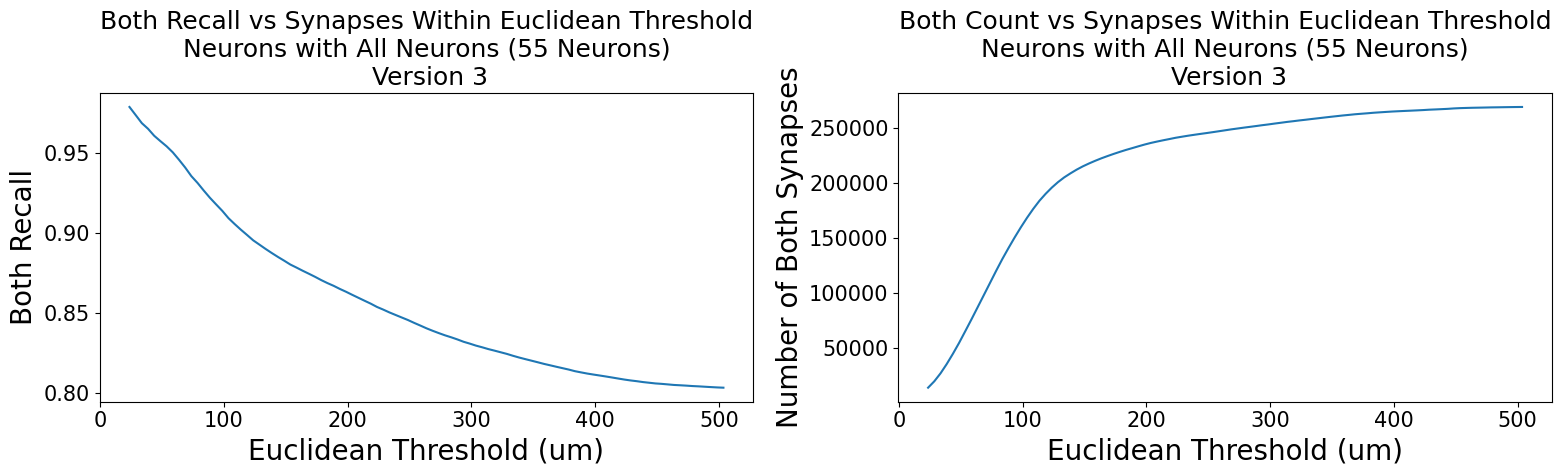

In [56]:
axon_length = -1
curr_query = f"axon_length>{axon_length}"
curr_query_title = f"All Neurons"
seg_ids_in_query = (minnie.AutoProofreadValidationNeurons() & curr_query).fetch("segment_id")

current_validation_df = cumulative_validation_df[cumulative_validation_df["old_segment_id"].isin(seg_ids_in_query)]

vu.score_vs_euclidean_synapse_threshold_analysis(current_validation_df,
                    title_append=f"Neurons with {curr_query_title} ({len(seg_ids_in_query)} Neurons)\n Version 3",
                    font_size = 15,
                    fig_width=8,
                    fig_height=5,
                    axes_font_size=20)